# Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить результаты в pandas dataframe
<hr>

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
-- Привести колонки датафрейма к одному типу данных
-- Проверить индекс, чтобы он соответствовал порядку строк
-- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки
<hr>

* Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
-- Рассчитать объемы вводимого жилья по регионам и по годам.
-- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
-- Визуализировать разброс, связь и распределение этих показателей по регионам
-- Сделать выводы по каждому из расчетов и графиков


In [1]:
import os
import numpy as np
import pandas as pd
import datetime

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pylab import rcParams
from IPython.display import display

Создание DF

In [3]:
construction_objects = pd.read_csv(filepath_or_buffer = ".\construction_projects.csv",
                                  sep = ',',
                                  usecols=['data.id','data.developer.regRegionDesc','data.objReady100PercDt','data.objElemLivingCnt','data.objLkFinishTypeDesc','data.objElemParkingCnt','data.objSquareLiving','data.objLkClassDesc','data.floorMax','data.objPriceAvg'],
                                  index_col='data.id',
                                  parse_dates=['data.objReady100PercDt'],
                                  dayfirst=True)

In [4]:
construction_objects.loc[:, 'data.objReady100PercDt'] = construction_objects.loc[:, 'data.objReady100PercDt'].dt.year

In [5]:
construction_objects.head()

,data.developer.regRegionDesc,data.objElemLivingCnt,data.objReady100PercDt,data.objLkFinishTypeDesc,data.objElemParkingCnt,data.objSquareLiving,data.objLkClassDesc,data.floorMax,data.objPriceAvg
data.id,,,,,,,,,
29678,Ростовская область,27,2020,Под чистовую,0,1519.00,Комфорт,NaN,NaN
13383,Тюменская область,68,2022,По желанию заказчика,31,6293.78,Элитный,20.0,53109.0
13397,Тюменская область,65,2024,Без отделки,0,6248.51,Элитный,12.0,45523.0
13399,Тюменская область,0,2024,Без отделки,125,0.00,Элитный,1.0,50768.0
13398,Тюменская область,43,2024,Без отделки,0,4812.98,Элитный,10.0,47886.0


In [6]:
construction_objects.dtypes

data.developer.regRegionDesc     object
data.objElemLivingCnt             int64
data.objReady100PercDt            int64
data.objLkFinishTypeDesc         object
data.objElemParkingCnt            int64
data.objSquareLiving            float64
data.objLkClassDesc              object
data.floorMax                   float64
data.objPriceAvg                float64
dtype: object

In [7]:
construction_objects.shape

(10000, 9)

Обработка значений None


In [8]:
construction_objects.isnull().sum(axis=0)

data.developer.regRegionDesc     117
data.objElemLivingCnt              0
data.objReady100PercDt             0
data.objLkFinishTypeDesc           0
data.objElemParkingCnt             0
data.objSquareLiving               0
data.objLkClassDesc                0
data.floorMax                      1
data.objPriceAvg                2724
dtype: int64

In [9]:
construction_objects1 = construction_objects.dropna(axis=0) 


Исключаем объекты с нулевой жилой площадью, т.к. к них относятся нежилые объекты (парковки, объекты нежилого назначения):

In [10]:

construction_objects2 = construction_objects1.loc[construction_objects['data.objSquareLiving'] != 0]

Найдем максимальную и минимальную цену за кв.м.:

In [11]:
max_price = construction_objects2[construction_objects2['data.objPriceAvg']==construction_objects2['data.objPriceAvg'].max()]
min_price = construction_objects2[construction_objects2['data.objPriceAvg']==construction_objects2['data.objPriceAvg'].min()]


In [12]:
max_price

,data.developer.regRegionDesc,data.objElemLivingCnt,data.objReady100PercDt,data.objLkFinishTypeDesc,data.objElemParkingCnt,data.objSquareLiving,data.objLkClassDesc,data.floorMax,data.objPriceAvg
data.id,,,,,,,,,
39716,Москва город,92,2024,Без отделки,267,14344.5,Элитный,10.0,1867937.0


In [13]:
min_price

,data.developer.regRegionDesc,data.objElemLivingCnt,data.objReady100PercDt,data.objLkFinishTypeDesc,data.objElemParkingCnt,data.objSquareLiving,data.objLkClassDesc,data.floorMax,data.objPriceAvg
data.id,,,,,,,,,
20654,Новосибирская область,160,2021,Под чистовую,0,8852.8,Типовой,11.0,5967.0


Максимальная цена зафиксирована на уровне 1867937 руб. за кв.м., регион Москва город	
Минимальная цена зафиксирована на уровне 5967 руб. за кв.м., регион Новосибирская обл.

Расчитаем среднюю цену за кв.м. по регионам:

In [14]:
meen_price = construction_objects2.groupby('data.developer.regRegionDesc').mean()
meen_price = meen_price.sort_values(by='data.objPriceAvg', ascending=False)

In [15]:
meen_price = meen_price['data.objPriceAvg']
meen_price

data.developer.regRegionDesc
Москва город                           249492.286957
Санкт-Петербург город                  166869.893112
Сахалинская область                    139566.483871
Ленинградская область                  133086.145695
Приморский край                        125508.706349
                                           ...      
Костромская область                     48699.844444
Северная Осетия - Алания Республика     45845.806452
Чеченская Республика                    37452.000000
Дагестан Республика                     30793.933333
Мурманская область                      20442.000000
Name: data.objPriceAvg, Length: 79, dtype: float64

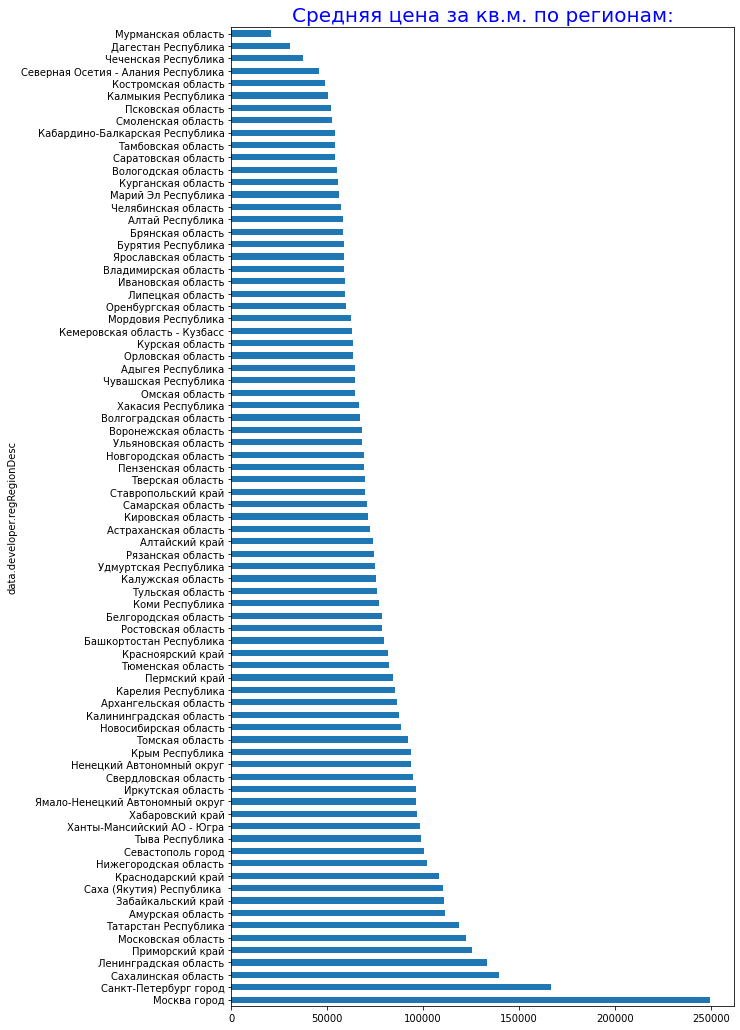

In [24]:
rcParams['figure.figsize'] = 9,18
meen_price.plot(kind='barh')
plt.title('Средняя цена за кв.м. по регионам:', size=20, color='b');
plt.show()

Наименьшая средняя стоимость жилья за кв.м. зафиксирована в Мурманской области, наибольшая в городе Москва

Рассчитем объемы вводимого жилья по регионам и по годам.


In [17]:
count_obj_year = construction_objects2.groupby(['data.objReady100PercDt', 'data.developer.regRegionDesc']).size().reset_index(name='data.id')


In [18]:
count_obj_year

,data.objReady100PercDt,data.developer.regRegionDesc,data.id
0,2017,Краснодарский край,1
1,2020,Московская область,1
2,2021,Владимирская область,1
3,2021,Дагестан Республика,3
4,2021,Красноярский край,1
...,...,...,...
311,2030,Вологодская область,1
312,2030,Краснодарский край,2
313,2031,Краснодарский край,4
314,2031,Ленинградская область,2


In [19]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [25]:
count_obj_year.shape

(316, 3)

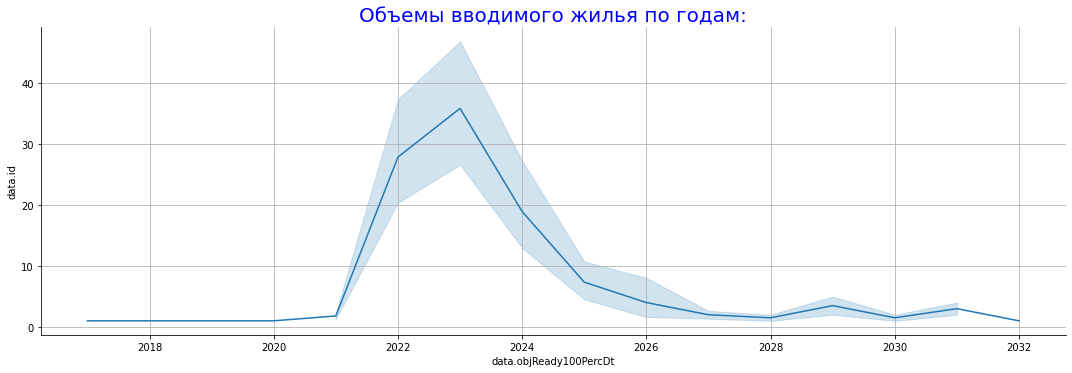

In [26]:
sns.relplot(x='data.objReady100PercDt',
            y='data.id',
            data=count_obj_year,
            aspect=3,
            kind='line'
            )
plt.grid()
plt.title('Объемы вводимого жилья по годам:', size=20, color='b');

Максимальные объемы сдаваемого жилья ожидаются в 2023 году

Объемы вводимого жилья по регионам:

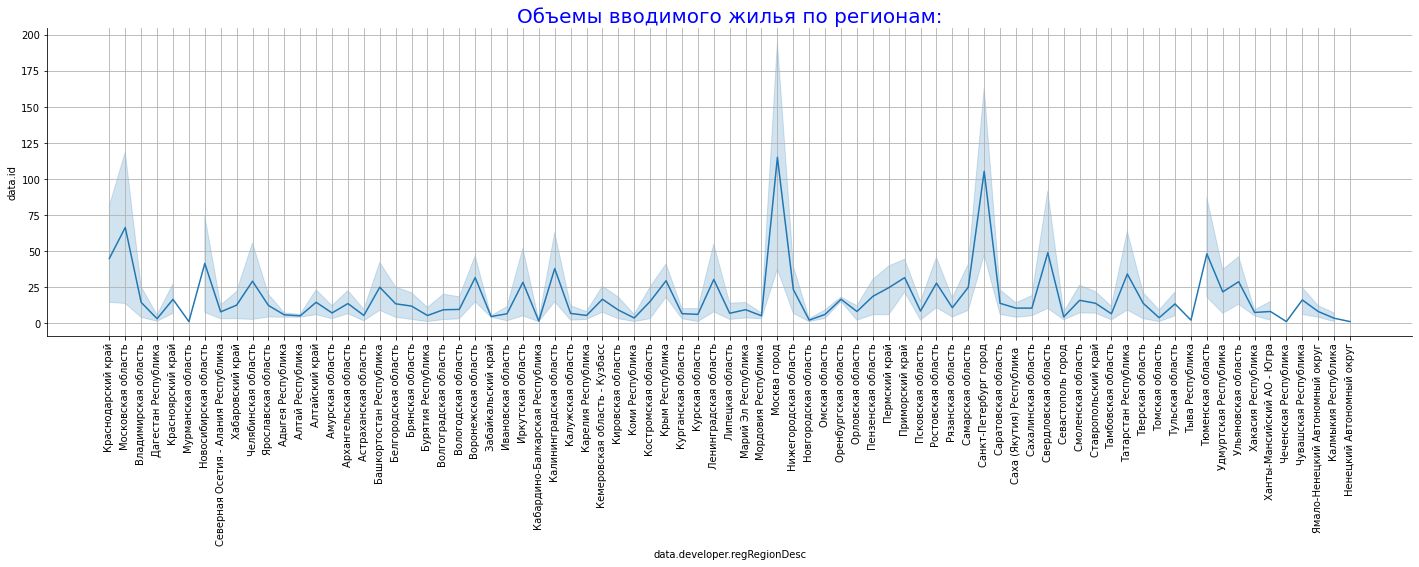

In [33]:
sns.relplot(x='data.developer.regRegionDesc',
            y='data.id',
            data=count_obj_year,
            aspect=4,
            kind='line',
            )
plt.xticks(rotation=90)
plt.grid()
plt.title('Объемы вводимого жилья по регионам:', size=20, color='b');

Наибольшее количество жилья будет сдано в регионах: г. Москва, г. Санкт-Петербург, Краснодарский край

Рассчет этажности по регионам:

In [34]:
floor_max = construction_objects2[construction_objects2['data.floorMax']==construction_objects2['data.floorMax'].max()]
floor_min = construction_objects2[construction_objects2['data.floorMax']==construction_objects2['data.floorMax'].min()]

In [35]:
floor_max

,data.developer.regRegionDesc,data.objElemLivingCnt,data.objReady100PercDt,data.objLkFinishTypeDesc,data.objElemParkingCnt,data.objSquareLiving,data.objLkClassDesc,data.floorMax,data.objPriceAvg
data.id,,,,,,,,,
19622,Москва город,314,2023,Без отделки,0,29982.44,Элитный,76.0,434687.0


In [36]:
floor_min

,data.developer.regRegionDesc,data.objElemLivingCnt,data.objReady100PercDt,data.objLkFinishTypeDesc,data.objElemParkingCnt,data.objSquareLiving,data.objLkClassDesc,data.floorMax,data.objPriceAvg
data.id,,,,,,,,,
41651,Челябинская область,2,2023,Под чистовую,0,159.05,Типовой,1.0,48827.0
29451,Челябинская область,2,2023,Под чистовую,0,159.05,Типовой,1.0,48827.0
41647,Челябинская область,2,2023,Под чистовую,0,159.05,Типовой,1.0,48827.0
41650,Челябинская область,2,2023,Под чистовую,0,159.05,Типовой,1.0,48827.0
41648,Челябинская область,2,2023,Под чистовую,0,159.05,Типовой,1.0,48827.0
41645,Челябинская область,2,2023,Под чистовую,0,159.05,Типовой,1.0,48827.0
41646,Челябинская область,2,2023,Под чистовую,0,159.05,Типовой,1.0,48827.0
41644,Челябинская область,2,2023,Под чистовую,0,159.05,Типовой,1.0,48827.0
41656,Челябинская область,2,2023,Под чистовую,0,159.05,Типовой,1.0,48827.0


Из сдающихся объектов самое высокое строение 76 этажей, в г. Москва, одноэтажных строений множество (например, в Челябинской обл.)

Рассчитаем среднюю этажность сдающихся домов:

In [37]:
count_meen = construction_objects2.groupby('data.developer.regRegionDesc').mean()
floor_meen = count_meen.sort_values(by='data.floorMax', ascending=False)
floor_meen = floor_meen['data.floorMax']
floor_meen

data.developer.regRegionDesc
Москва город                 21.882609
Рязанская область            19.339623
Свердловская область         19.323770
Башкортостан Республика      17.932886
Приморский край              17.285714
                               ...    
Калмыкия Республика           6.700000
Костромская область           5.488889
Тыва Республика               5.000000
Ненецкий Автономный округ     5.000000
Мурманская область            3.000000
Name: data.floorMax, Length: 79, dtype: float64

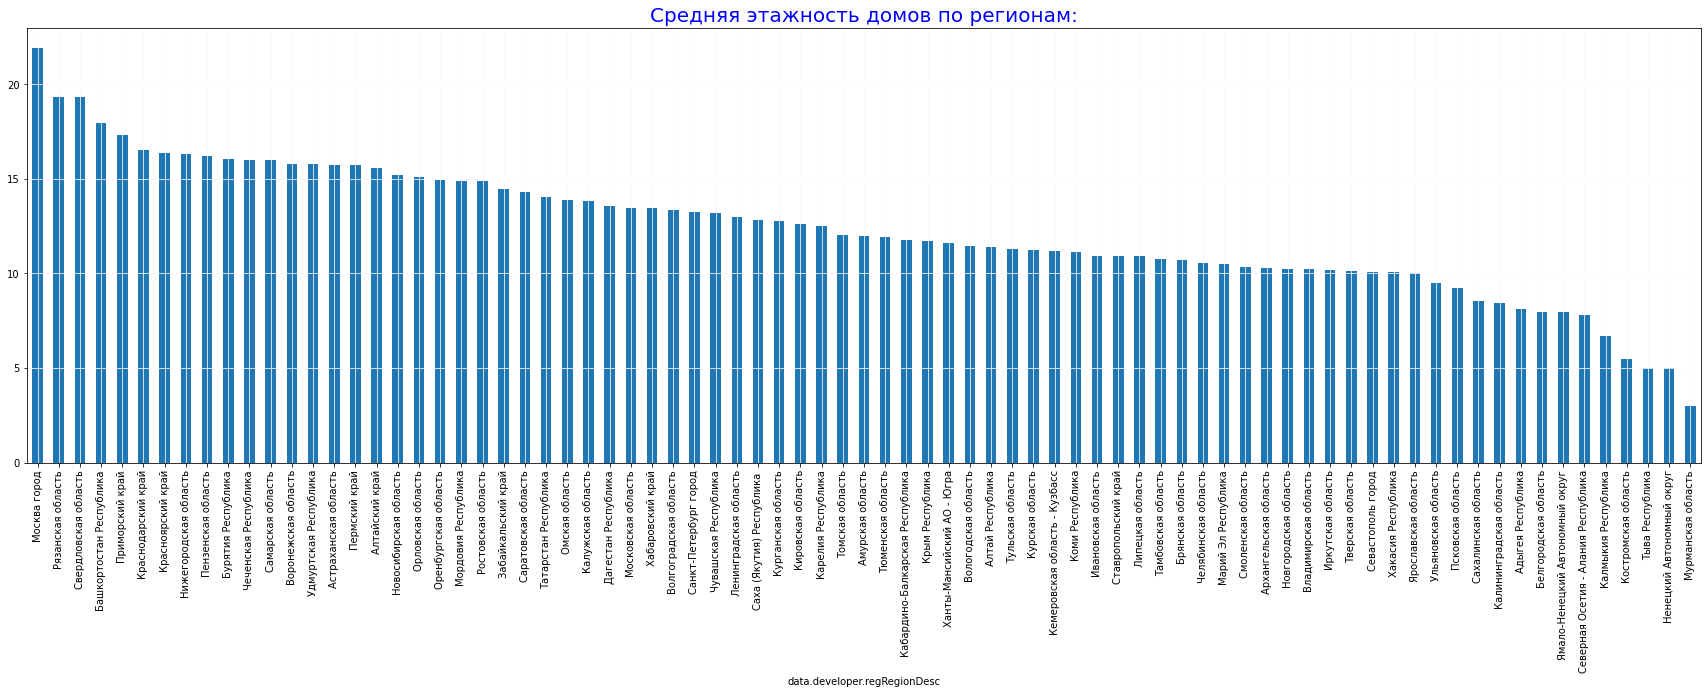

In [38]:
rcParams['figure.figsize'] = 30,8
floor_meen.plot(kind='bar')
plt.grid(color='ghostwhite')
plt.title('Средняя этажность домов по регионам:', size=20, color='b');


В среднем самые высокие дома будут сданы в г. Москва. Этажность составила 21,8.
Самые низки дома в Мурманской области. Средняя этажность составляет 3.

Рассчитаем количество квартир в сдаваемых домах в зависимости от класса недвижимости:

In [39]:
count_flat = construction_objects2.groupby(['data.objLkClassDesc', 'data.developer.regRegionDesc', 'data.objElemLivingCnt', 'data.objSquareLiving']).size().reset_index(name='data.id')

In [40]:
count_flat

,data.objLkClassDesc,data.developer.regRegionDesc,data.objElemLivingCnt,data.objSquareLiving,data.id
0,Бизнес,Адыгея Республика,222,15661.49,1
1,Бизнес,Адыгея Республика,288,18526.90,1
2,Бизнес,Алтайский край,40,4345.06,1
3,Бизнес,Алтайский край,76,5218.31,1
4,Бизнес,Алтайский край,121,10263.94,1
...,...,...,...,...,...
5726,Элитный,Тюменская область,44,4297.44,1
5727,Элитный,Тюменская область,65,6248.51,1
5728,Элитный,Тюменская область,68,6293.78,1
5729,Элитный,Ульяновская область,14,1409.40,1


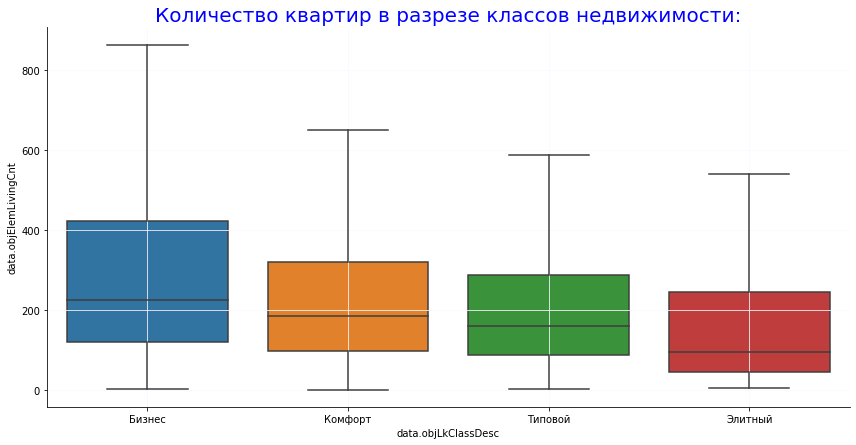

In [41]:
sns.catplot(x='data.objLkClassDesc',
            y='data.objElemLivingCnt',
            data=count_flat,
            kind='box',
            aspect=2,
            height=6,
            sym='');

plt.grid(color='ghostwhite')
plt.title('Количество квартир в разрезе классов недвижимости:', size=20, color='b');

Наименьшее количество квартир в этитном классе жилья. Диапазон от 50 до 250 квартир. В среднем около 100.
Наибольшее количество квартир в бизнес классе. Диапазон от 100 до 420. В среднем около 210. Наибольший выброс так же отмечается в этом классе - доходит до 850.


Рассчитаем среднее количество квартир в строящихся домах в разрезе регионов:

In [42]:
count_meen
flat_meen = count_meen.sort_values(by='data.objElemLivingCnt', ascending=False)
flat_meen = flat_meen['data.objElemLivingCnt']
flat_meen

data.developer.regRegionDesc
Москва город                 441.913043
Санкт-Петербург город        376.026128
Ленинградская область        342.178808
Московская область           313.881466
Рязанская область            307.075472
                                ...    
Марий Эл Республика           76.513514
Калмыкия Республика           58.800000
Костромская область           47.911111
Ненецкий Автономный округ     45.000000
Мурманская область            15.000000
Name: data.objElemLivingCnt, Length: 79, dtype: float64

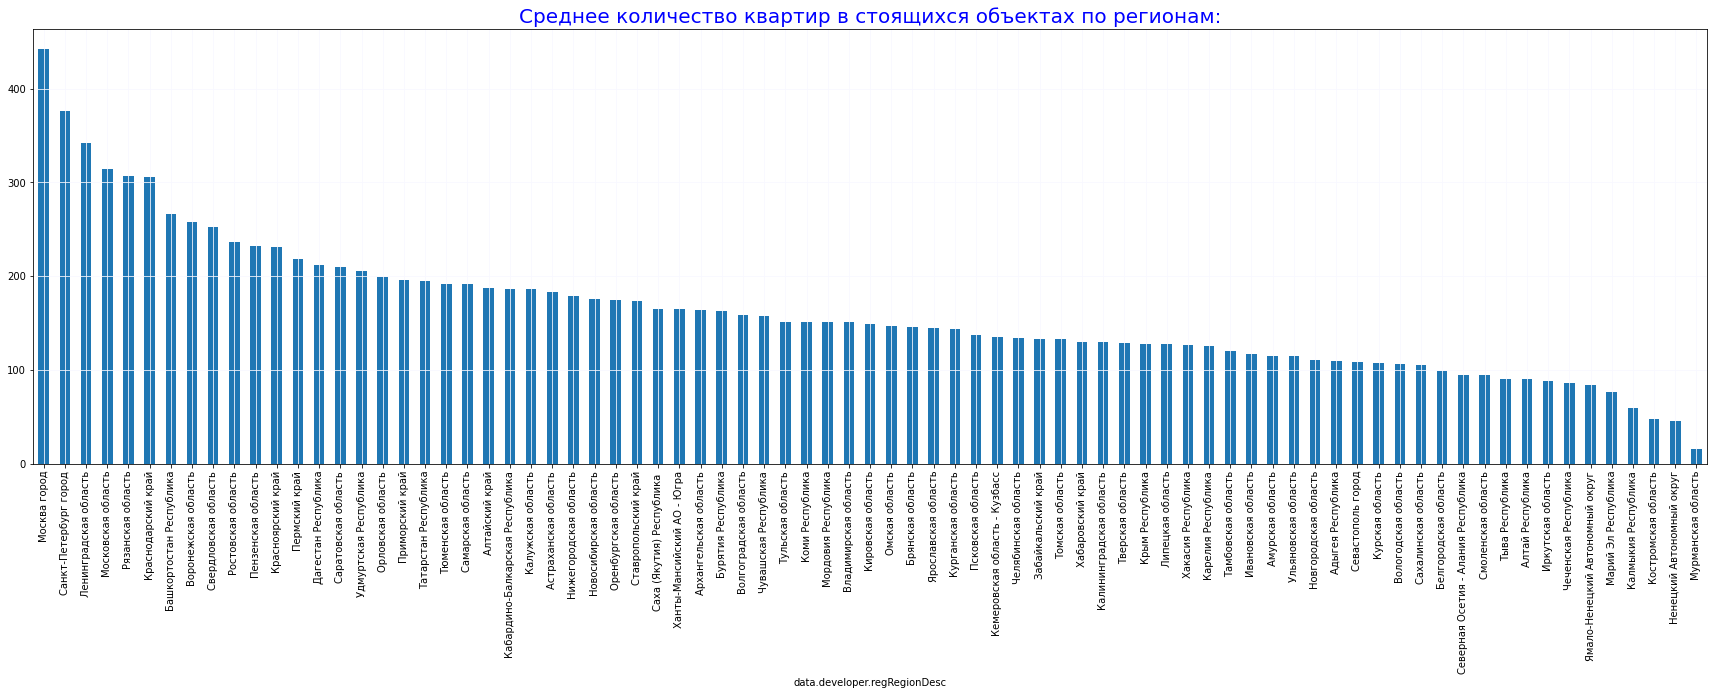

In [43]:
rcParams['figure.figsize'] = 30,8
flat_meen.plot(kind='bar')
plt.grid(color='ghostwhite')
plt.title('Среднее количество квартир в стоящихся объектах по регионам:', size=20, color='b');


Наибольшее среднее количество квартир в строящихся домах г. Москва (441,9), наименьшее в Мурманской области (15)

Определим какие типа отделки предлагают застройщики:

In [44]:
count_type_finish = construction_objects2.groupby(['data.objLkFinishTypeDesc']).size().reset_index(name='data.id')
count_type_finish

,data.objLkFinishTypeDesc,data.id
0,Без отделки,2941
1,Другое,574
2,По желанию заказчика,880
3,Под ключ,885
4,Под чистовую,1293


In [49]:
list_finish_type = []
for i in count_type_finish['data.objLkFinishTypeDesc']:
    list_finish_type.append(i)

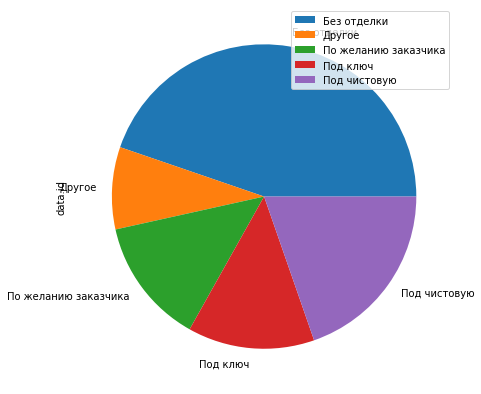

In [51]:
plot = count_type_finish.plot.pie(labels=list_finish_type, y='data.id', figsize=(7, 7));

В большинстве сдаваемых объектов тип отделки в сдаваемом жилье будет определен по желанию заказчика

Определим в каком регионе сдаются квартиры с наибольшей площадью:

Ранее были исключены объекты с нулевой жилой площадью, поэтому будем считать, что один дом за одну квартиру, в случае нулевого количества квартир.

In [52]:
for j in count_flat['data.objElemLivingCnt']:
    if j == 0:
        j = 1

In [53]:
count_flat['MeenSquare'] = count_flat['data.objSquareLiving']/count_flat['data.objElemLivingCnt']

In [54]:
count_flat

,data.objLkClassDesc,data.developer.regRegionDesc,data.objElemLivingCnt,data.objSquareLiving,data.id,MeenSquare
0,Бизнес,Адыгея Республика,222,15661.49,1,70.547252
1,Бизнес,Адыгея Республика,288,18526.90,1,64.329514
2,Бизнес,Алтайский край,40,4345.06,1,108.626500
3,Бизнес,Алтайский край,76,5218.31,1,68.661974
4,Бизнес,Алтайский край,121,10263.94,1,84.825950
...,...,...,...,...,...,...
5726,Элитный,Тюменская область,44,4297.44,1,97.669091
5727,Элитный,Тюменская область,65,6248.51,1,96.130923
5728,Элитный,Тюменская область,68,6293.78,1,92.555588
5729,Элитный,Ульяновская область,14,1409.40,1,100.671429


In [55]:
flat_square = count_flat.groupby('data.developer.regRegionDesc').mean()
flat_square = flat_square.sort_values(by='MeenSquare', ascending=False)
flat_square = flat_square['MeenSquare']
flat_square

data.developer.regRegionDesc
Чеченская Республика                   89.696163
Липецкая область                       72.025546
Кабардино-Балкарская Республика        70.977919
Дагестан Республика                    69.132747
Северная Осетия - Алания Республика    65.874821
                                         ...    
Архангельская область                  48.087228
Санкт-Петербург город                  47.505935
Тыва Республика                        47.474111
Ленинградская область                  45.906836
Адыгея Республика                      44.644572
Name: MeenSquare, Length: 79, dtype: float64

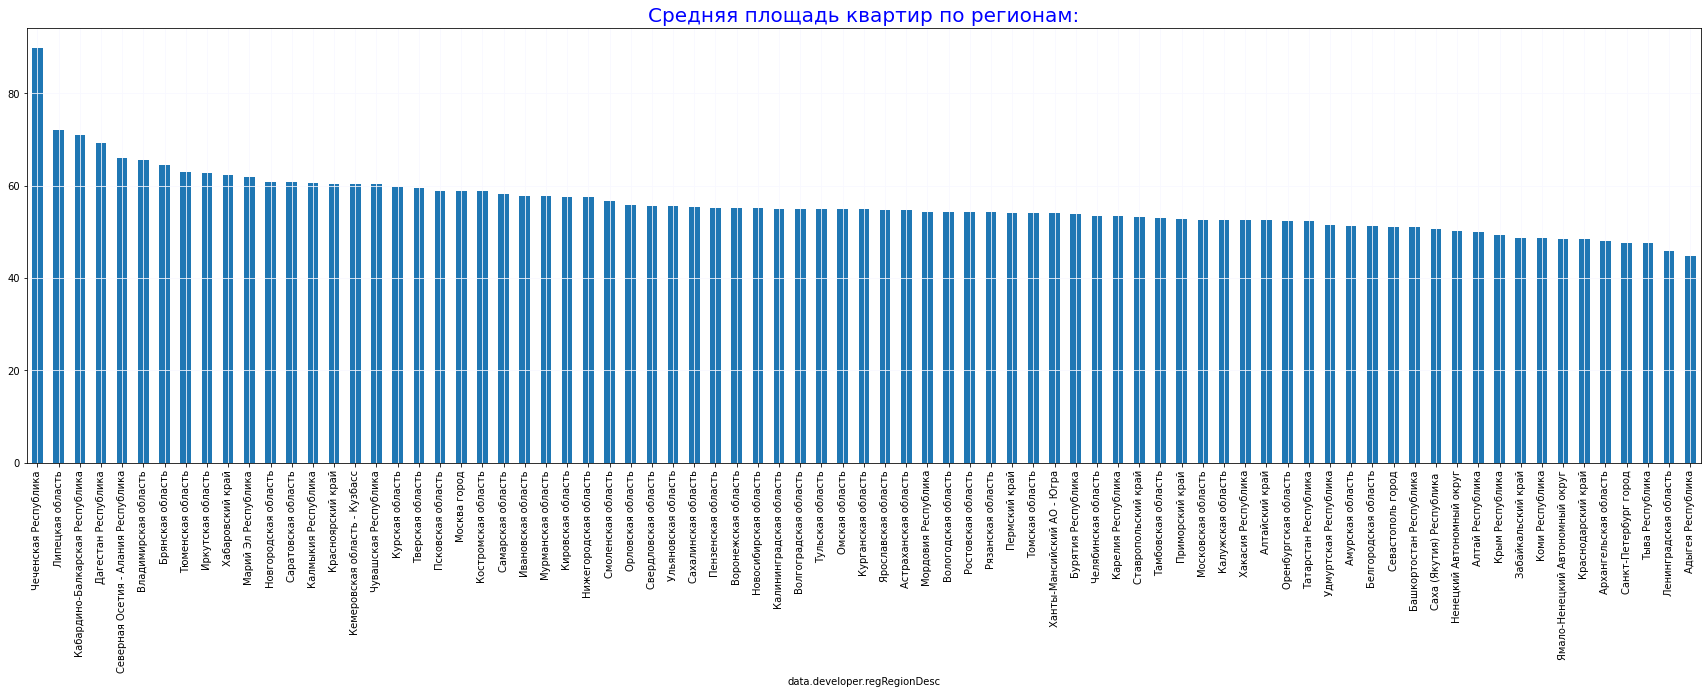

In [56]:
rcParams['figure.figsize'] = 30,8
flat_square.plot(kind='bar')
plt.grid(color='ghostwhite')
plt.title('Средняя площадь квартир по регионам:', size=20, color='b');

Наибольшая средняя жилая площадь среди сдаваемых объектов 89,7 кв.м. в Чеченской Республике, наименьшая 44,6 кв.м. в Республике Адыгея.